In [7]:
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename (in case you upload a different file)
filename = next(iter(uploaded))

# Load dataset
df = pd.read_csv(filename)
df.head()

import pandas as pd
from google.colab import files

files.upload()  # Upload player_stats_2023.csv
df = pd.read_csv('player_stats_2023.csv')
df.head()

Saving player_stats_2023.csv to player_stats_2023.csv


,player_id,player_name,position,minutes_played,goals,assists,tackles,interceptions,passes_completed,market_value
0,1,Player_1,Midfielder,1363,5,5,16,10,1728,11188507
1,2,Player_2,Goalkeeper,1063,10,3,4,15,1801,10861032
2,3,Player_3,Defender,1520,3,6,12,4,486,10224700
3,4,Player_4,Midfielder,595,2,6,11,6,2035,14455148
4,5,Player_5,Forward,2423,5,3,11,8,2443,6549850


In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv('player_stats_2023.csv')
df.head()


,player_id,player_name,position,minutes_played,goals,assists,tackles,interceptions,passes_completed,market_value
0,1,Player_1,Midfielder,1363,5,5,16,10,1728,11188507
1,2,Player_2,Goalkeeper,1063,10,3,4,15,1801,10861032
2,3,Player_3,Defender,1520,3,6,12,4,486,10224700
3,4,Player_4,Midfielder,595,2,6,11,6,2035,14455148
4,5,Player_5,Forward,2423,5,3,11,8,2443,6549850


In [10]:
# Drop missing or invalid data
df.dropna(subset=['minutes_played', 'goals'], inplace=True)

# Normalize stats per 90 minutes
df['goals_per_90'] = df['goals'] / df['minutes_played'] * 90
df['assists_per_90'] = df['assists'] / df['minutes_played'] * 90
df['tackles_per_90'] = df['tackles'] / df['minutes_played'] * 90


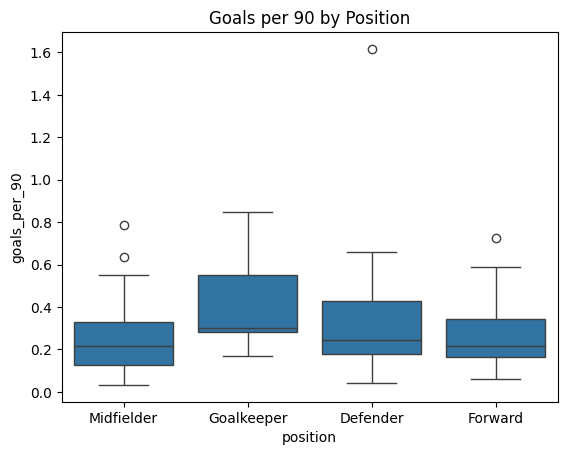

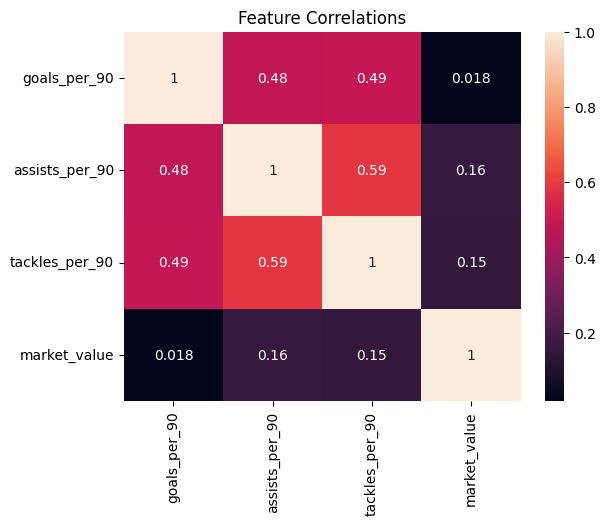

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare positions
sns.boxplot(x='position', y='goals_per_90', data=df)
plt.title('Goals per 90 by Position')
plt.show()

# Correlation heatmap
sns.heatmap(df[['goals_per_90', 'assists_per_90', 'tackles_per_90', 'market_value']].corr(), annot=True)
plt.title('Feature Correlations')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target
features = ['goals_per_90', 'assists_per_90', 'tackles_per_90']
X = df[features]
y = df['market_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
print("R² Score:", model.score(X_test, y_test))


R² Score: -0.47638710611652835


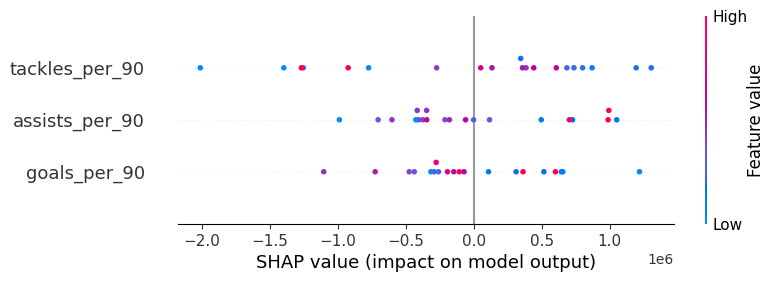

In [13]:
import shap

# Explain model predictions
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Visualize SHAP
shap.plots.beeswarm(shap_values)


In [14]:
# Define total contribution metric
df['contribution_per_90'] = df['goals_per_90'] + df['assists_per_90']

# Select top forwards
top_forwards = df[df['position'] == 'Forward'].sort_values(by='contribution_per_90', ascending=False).head(10)

# Display
print(top_forwards[['player_name', 'contribution_per_90', 'market_value']])


   player_name  contribution_per_90  market_value
68   Player_69             1.736334      13777247
99  Player_100             1.299213      13972995
71   Player_72             0.794451       6789249
10   Player_11             0.695187       2833679
37   Player_38             0.684700      11510186
58   Player_59             0.541416       2681906
83   Player_84             0.481541      10507571
5     Player_6             0.478511       1350350
56   Player_57             0.478088       7390709
77   Player_78             0.437158       7999412


In [15]:
top_forwards.to_csv('top_10_forwards.csv', index=False)
